                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

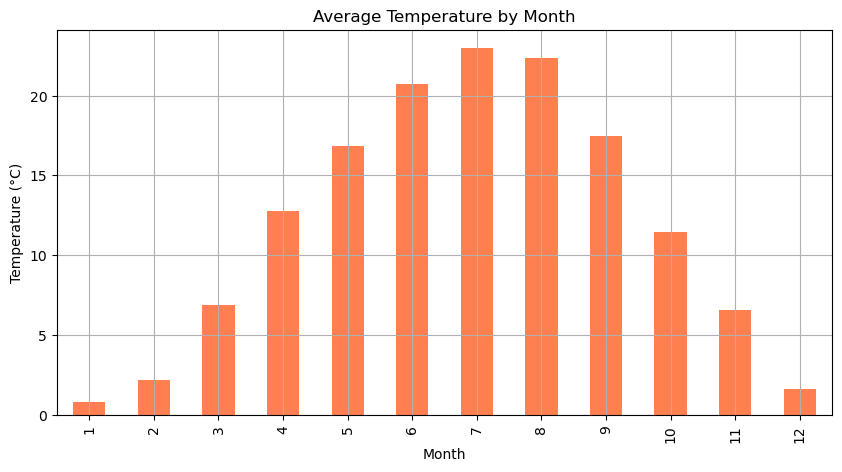

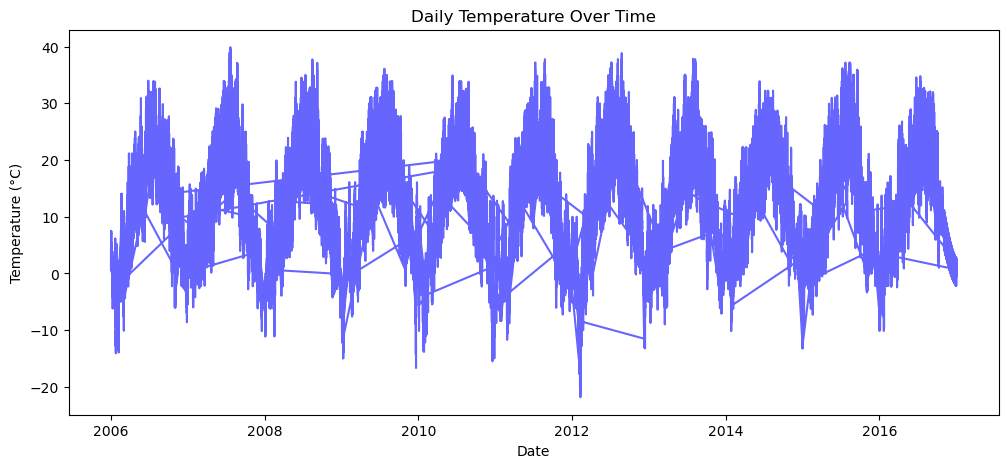

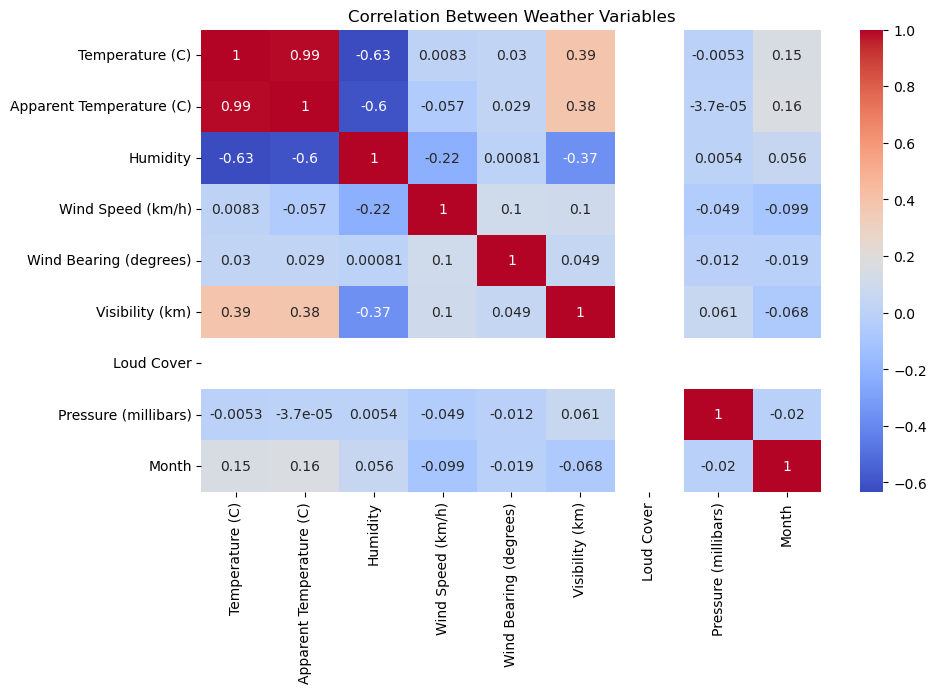

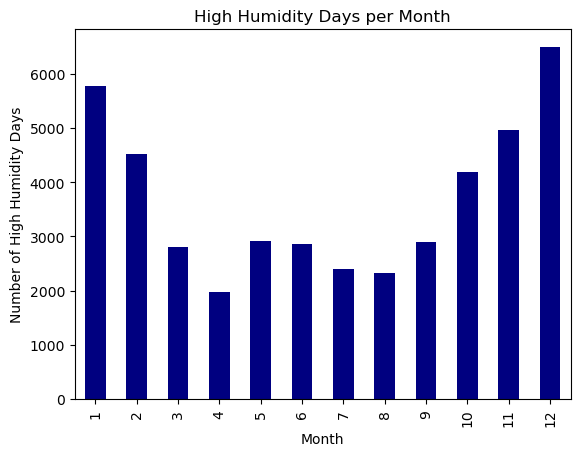

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure inline plotting in Jupyter notebooks
try:
    get_ipython().run_line_magic('matplotlib', 'inline')
except:
    pass

# Load the dataset
df = pd.read_csv("weather.csv")
print(df.head())

# 🧹 Step 1: Clean and Prepare the Data
# Convert 'Formatted Date' to datetime - handling the timezone information
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df.dropna(inplace=True)
print(df.info())

# 🌡 Step 2: Average Temperature by Month
# Extract month from datetime (now that it's properly converted)
df['Month'] = df['Formatted Date'].dt.month
monthly_avg = df.groupby('Month')['Temperature (C)'].mean()

plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='coral')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Step 3: Daily Temperature Over Time
plt.figure(figsize=(12, 5))
plt.plot(df['Formatted Date'], df['Temperature (C)'], color='blue', alpha=0.6)
plt.title('Daily Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

# 🔍 Step 4: Correlation Between Weather Features
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Weather Variables')
plt.show()

# Step 5: High Humidity Days per Month
df['High Humidity'] = df['Humidity'] > 0.8  # Defining high humidity as >80%
high_humidity_days = df.groupby('Month')['High Humidity'].sum()

high_humidity_days.plot(kind='bar', color='navy')
plt.title('High Humidity Days per Month')
plt.xlabel('Month')
plt.ylabel('Number of High Humidity Days')
plt.show()